In [115]:
# System
import os
import json

# Web Scraping
import requests
from bs4 import BeautifulSoup

# Data
import numpy as np
import pandas as pd

# View
import matplotlib.pyplot as plt
import matplotlib.patches
import seaborn as sns
from IPython.display import Image

# ML
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# ML Models
from sklearn.dummy import DummyClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import OneClassSVM
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [116]:
# Utilities Files
def read_csv(name: str, index_label='id') -> pd.DataFrame:
    return pd.read_csv('../data/' + name + '.csv', index_col=index_label)


def save_csv(df: pd.DataFrame, name: str, index_label='id'):
    df.to_csv('../data/' + name + '.csv', index_label=index_label)

def show_image(name: str):
    return Image(filename= '../images/' + name + '.png')

In [117]:
# Development Flags
SHOW_IN_RELEASE = False
SHOW_IN_DEVELOPMENT = True
MIN_DATA_MODE = False

In [118]:
if SHOW_IN_RELEASE:
    show_image('Sorry')

In [119]:
if SHOW_IN_RELEASE:
    show_image('Data_Collectors')

In [120]:
# Load the data

df_original = read_csv('businesses')

if MIN_DATA_MODE:
    df_original = train_test_split(df_original, train_size=0.05, random_state=70)[0]

df = df_original.copy()

# Remove text columns and 'ExpensiveLevel'
df.drop(["Url", "Name", "ExpensiveLevel", "SubCategories", "AttributesHas"], axis=1, inplace=True)

In [121]:
# Split the data to Train and Final Test

Y = target = df["HasExpensiveLevel"]
X = data = df.drop(["HasExpensiveLevel"], axis=1)
x_train, x_finale_test, y_train, y_finale_test = train_test_split(X, Y, test_size=0.03, random_state=70)

In [122]:
# create Data Frame of the Train Data

df = df_train = pd.concat([y_train, x_train], axis=1)
df.reset_index(drop=True, inplace=True)

In [123]:
# Visuation for undsending the data

In [124]:
# Config
# Config Colors
legend_colors = ['tab:blue', 'tab:orange']

# Config columns names
target_column = "HasExpensiveLevel"
target_column_label = "Is Expensive"
target_column_label_true = "Is Expensive"
target_column_label_false = "Is not Expensive"

prime_flag_columns = [
    'Claimed', 'HasWebsite'
]

prime_countable_columns = [
    'Stars',
    'SubCategoriesCount', 'AttributesCount',
    'QuestionsCount', 'WeeklyBreaks', 'WeeklyDays'
]
prime_non_countable_columns = [
     'Reviews', 'Photos',
    'WeeklyHours'
]

prime_columns = prime_flag_columns + prime_countable_columns + prime_non_countable_columns

In [125]:
# Describe
if SHOW_IN_RELEASE:
    df[[target_column] + prime_columns].describe()

# The data is balanced

In [126]:
# Visuation functions for columns

def disply_count_of_flag_column(column_name: str, column_label: str, true_label: str, false_label: str, labels: list):
    global legend_colors, df, target_column
    
    df_sp = df[[target_column, column_name]]
    
    count_df = df_sp.groupby([column_name]).count()
    
    count_true_has = df_sp[df_sp[column_name] == 1][target_column].sum()
    count_true_not_has = df_sp[df_sp[column_name] == 1][target_column].count() - count_true_has
    
    count_false_has = df_sp[df_sp[column_name] == 0][target_column].sum()
    count_false_not_has = df_sp[df_sp[column_name] == 0][target_column].count() - count_false_has
    
    # Main elements    
    fig = plt.figure(figsize = [16, 8])
    
    fig.suptitle(column_label)
    
    ax_graf =  fig.add_subplot(1, 3, 1)
    ax_true =  fig.add_subplot(1, 3, 2)
    ax_false = fig.add_subplot(1, 3, 3) 
        
    # Graf
    plt.sca(ax_graf)
    ax_graf.bar( [true_label,false_label], count_df[target_column].values)
    plt.xlabel(true_label)
    plt.ylabel("Count")
    
    # Pies
    plt.sca(ax_true)
    plt.title(true_label)
    
    ax_true.pie([count_true_has, count_true_not_has],
                radius=4,
                center=(4, 4),
                startangle=90,
                autopct='%1.0f%%',
                colors=legend_colors)
    
    ax_true.set(xlim=(0, 8), ylim=(0, 8))
        
    plt.sca(ax_false)
    plt.title(false_label)
    ax_false.pie([count_false_has, count_false_not_has],
                radius=4,
                center=(4, 4),
                startangle=90,
                autopct='%1.0f%%',
                colors=legend_colors)
    
    ax_false.set(xlim=(0, 8), ylim=(0, 8))
    
    # show        
    handles = []
    for i in range(len(labels)):
        handles.append(matplotlib.patches.Patch(label=labels[i], color=legend_colors[i]))

    fig.legend(handles=handles, loc ="lower right")
    
    plt.show()


In [127]:
def disply_atter_per_column(inedexs: list, values: list, columns_label: list, min_value: float, max_value: float):
    global legend_colors, target_column, target_column_label
    
    # Main elements    
    fig = plt.figure(figsize = [16, 8])
        
    for i in range(len(values)):        
        value = values[i]
        if value is not None:
            index = indexs[i]
            label = columns_label[i]
            
            # Graf
            ax_graf =  fig.add_subplot(1, len(values), i+1)
            
            plt.sca(ax_graf)
            plt.plot(index, value)
            plt.xlabel(label)
            plt.ylabel(target_column_label)
            plt.ylim(min_value, max_value)
            
    plt.show()

In [128]:
def disply_mluti_bars(inedexs: list, values: list, indexs_label, values_label, w: int):
    global legend_colors
    
    values += np.full(elements_in_line-len(values)%elements_in_line, None).tolist()
    inedexs += np.full(elements_in_line-len(values)%elements_in_line, None).tolist()
    
    h = int(len(values) / elements_in_line)
    
    # Main elements 
    fig = plt.figure(figsize = [16, h * 8])
    
    gs = fig.add_gridspec(h, w)
    
    line = 0
    while len(values) > 0:
        now_values = values[:elements_in_line]
        now_inedexs = inedexs[:elements_in_line]
                
        for i in range(w):        
            value = now_values[i]
            if value is not None:
                index = now_inedexs[i]
                value = now_values[i]
            
                index_label = indexs_label
                value_label = values_label
                if type(indexs_label) == list:
                    index_label = indexs_label[i]
            
                if type(values_label) == list:
                    value_label = values_label[i]
            
                # Graf
                ax_graf = fig.add_subplot(gs[line, i])
        
                plt.sca(ax_graf)
                plt.bar(index, value)
                plt.xlabel(index_label)
                plt.ylabel(value_label)
                
        values = values[elements_in_line:]
        inedexs = inedexs[elements_in_line:]
        
        if type(indexs_label) == list:
            indexs_label = indexs_label[elements_in_line:]
            
        if type(values_label) == list:
            values_label = values_label[elements_in_line:]
        
        line += 1
    
    plt.show()

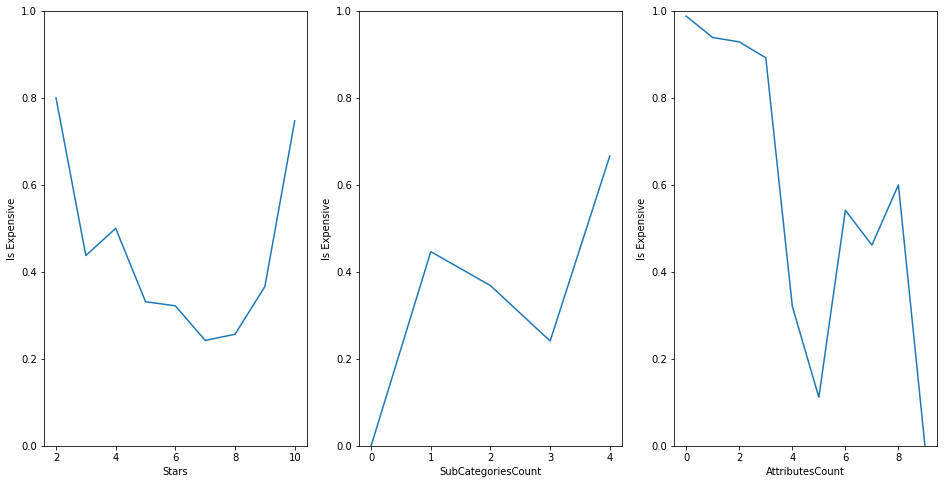

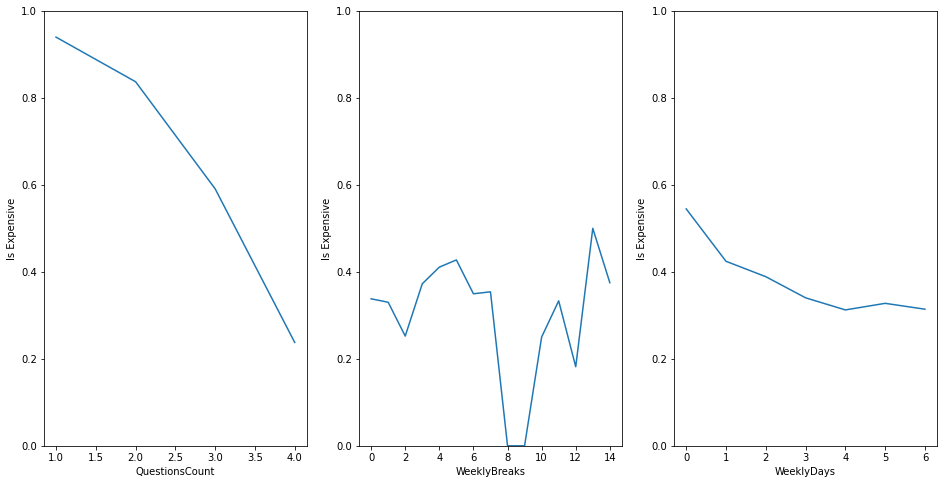

<Figure size 1152x576 with 0 Axes>

In [129]:
# Shows the average of "Has Expensive Level" for every column by value
# Average of "Has Expensive Level" symbolizes how likely it is to have expensive level

if SHOW_IN_DEVELOPMENT:
    
    printed_columns = prime_countable_columns
    atter_name = 'mean'
    
    elements_in_line = 3
    printed_columns += np.full(elements_in_line-len(printed_columns)%elements_in_line, None).tolist()
    while len(printed_columns) > 0:
        now_columns = printed_columns[:elements_in_line]
        indexs = []
        values = []
        for column in now_columns:
            if column is None:
                indexs += [None]
                values += [None]
            else:
                atter_df = df[[target_column, column]].groupby([column])
                atter_df = getattr(atter_df, atter_name)()
            
                indexs += [atter_df.index]
                values += [atter_df[target_column].values]            
        
        disply_atter_per_column(indexs, values, printed_columns[:elements_in_line], 0.0, 1.0)
        printed_columns = printed_columns[elements_in_line:]

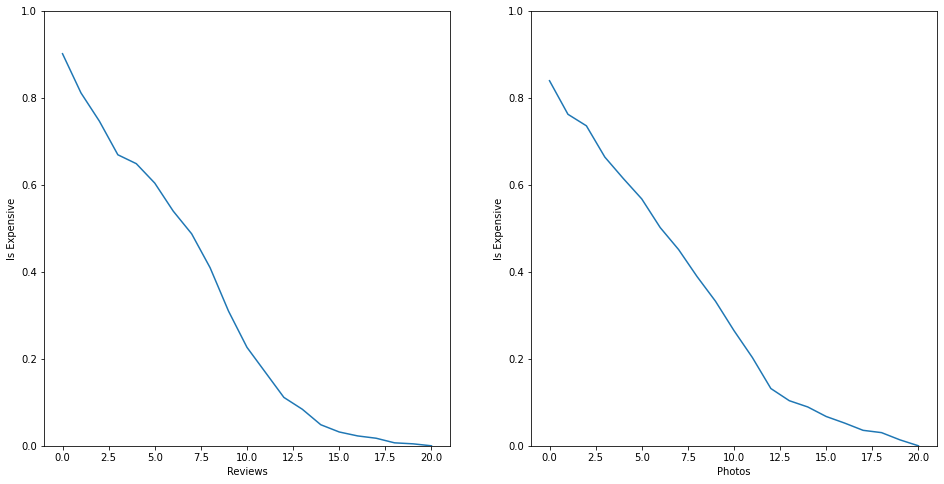

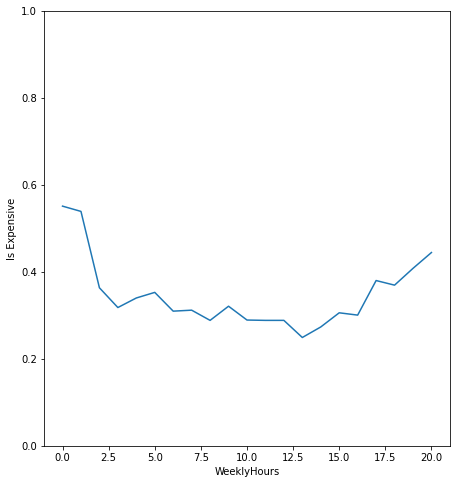

In [130]:
## calculates the probability based on sections

if SHOW_IN_DEVELOPMENT:
    
    sections=20
    atter_name = 'mean'
    elements_in_line = 2
    printed_columns = prime_non_countable_columns
    
    printed_columns += np.full(elements_in_line-len(printed_columns)%elements_in_line, None).tolist()
    while len(printed_columns) > 0:
        now_columns = printed_columns[:elements_in_line]
        indexs = []
        values = []
        for column in now_columns:
            if column is None:
                indexs += [None]
                values += [None]
            else:
                new_df = df[[target_column, column]].sort_values(column)
                length = len(new_df)
                new_df["Sections"] = df.index//(length//sections)
                section_name = range(0,100,100//sections)
                atter_df = new_df[[target_column, "Sections"]].groupby(["Sections"])
                atter_df = getattr(atter_df, atter_name)()
            
                indexs += [atter_df.index]
                values += [atter_df[target_column].values]            
        
        disply_atter_per_column(indexs, values, printed_columns[:elements_in_line], 0.0, 1.0)
        printed_columns = printed_columns[elements_in_line:]


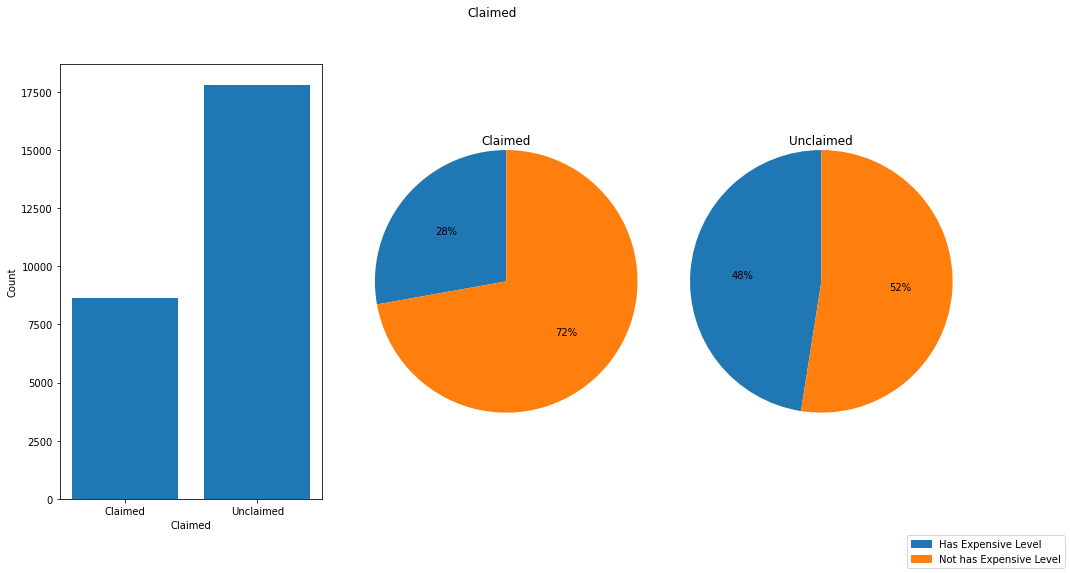

In [131]:
# Shows Claimed

if SHOW_IN_DEVELOPMENT: 
    disply_count_of_flag_column('Claimed', 'Claimed', 'Claimed', 'Unclaimed',
                                ['Has Expensive Level', 'Not has Expensive Level'])

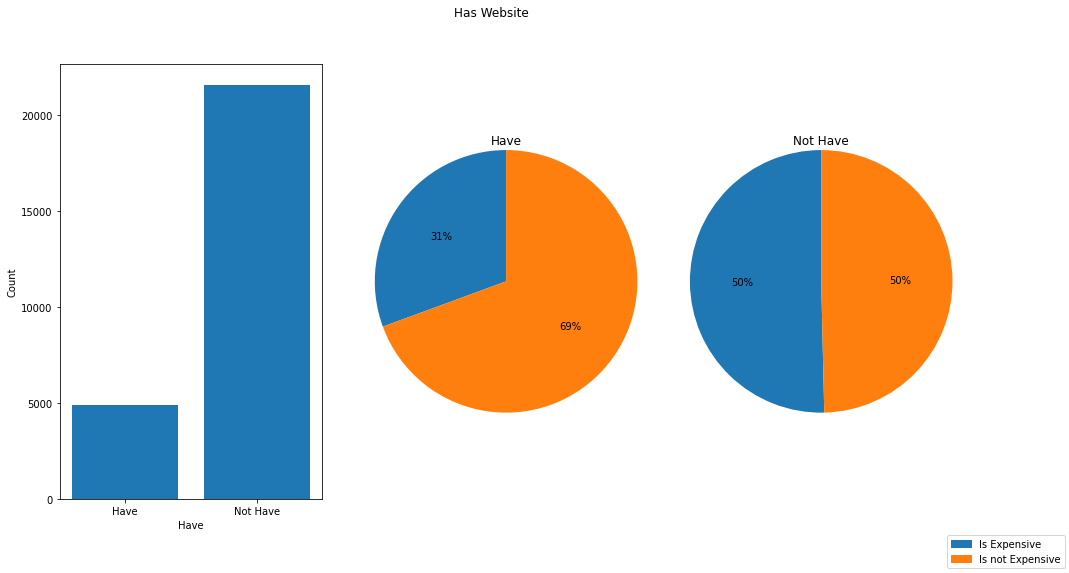

In [132]:
# Has Website

if SHOW_IN_DEVELOPMENT:
    disply_count_of_flag_column('HasWebsite', 'Has Website', 'Have', 'Not Have',
                                [target_column_label_true, target_column_label_false])

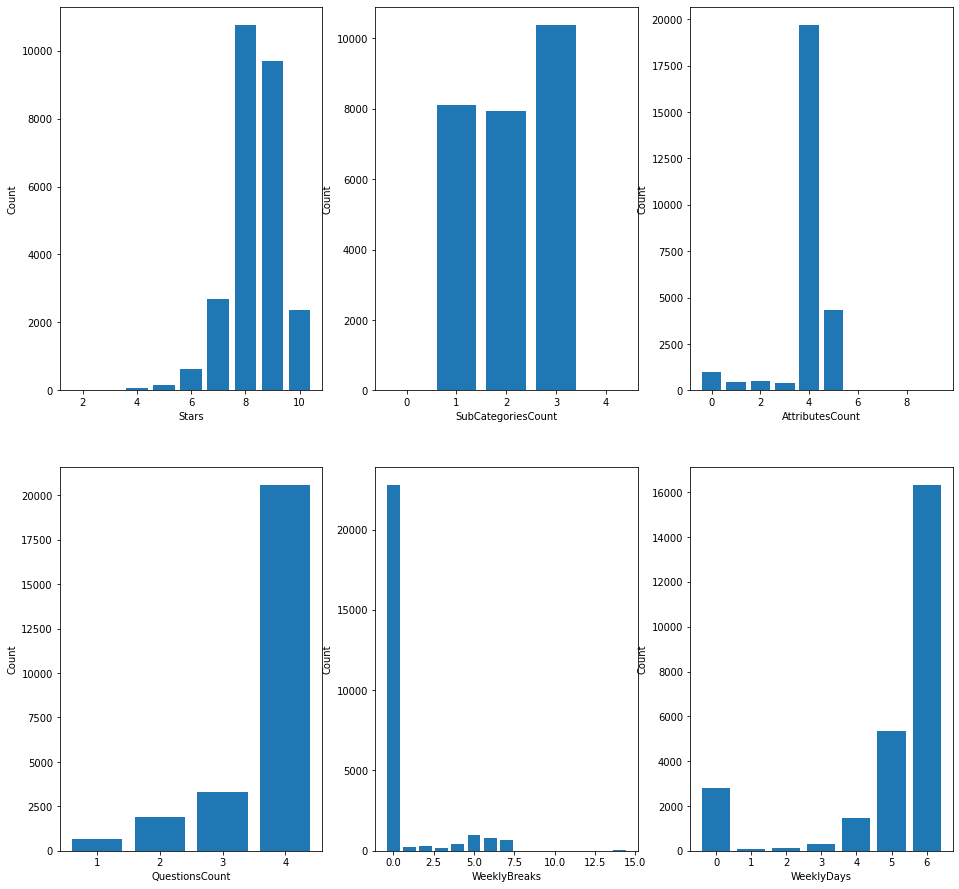

In [133]:
# Shows how much data we have for each value in each feature

if SHOW_IN_DEVELOPMENT:
    
    printed_columns = prime_countable_columns  
    elements_in_line = 3
    indexs = []
    values = []
    for column in printed_columns:
        if column is not None:
            count_df = df[[target_column, column]].groupby([column]).count()
            
            indexs += [count_df.index]
            values += [count_df[target_column].values.tolist()]            
    
    disply_mluti_bars(indexs, values, printed_columns, 'Count', elements_in_line)
    

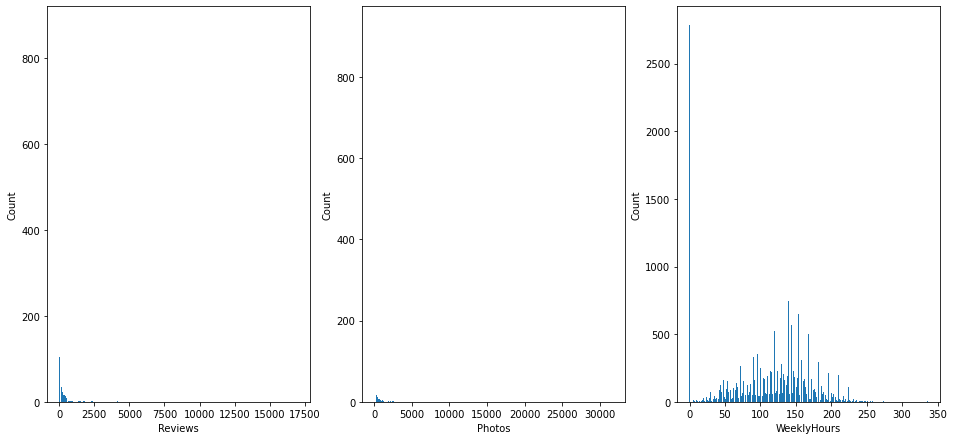

<Figure size 1152x1152 with 0 Axes>

In [134]:
if SHOW_IN_DEVELOPMENT:
    
    printed_columns = prime_non_countable_columns    
    elements_in_line = 3
    printed_columns += np.full(elements_in_line-len(printed_columns)%elements_in_line, None).tolist()
    while len(printed_columns) > 0:
        now_columns = printed_columns[:elements_in_line]
        indexs = []
        values = []
        for column in now_columns:
            if column is None:
                indexs += [None]
                values += [None]
            else:
                count_df = df[[target_column, column]].groupby([column]).count()
            
                indexs += [count_df.index]
                values += [count_df[target_column].values.tolist()]            

        disply_mluti_bars(indexs, values, printed_columns[:elements_in_line], 'Count', elements_in_line)
        printed_columns = printed_columns[elements_in_line:]

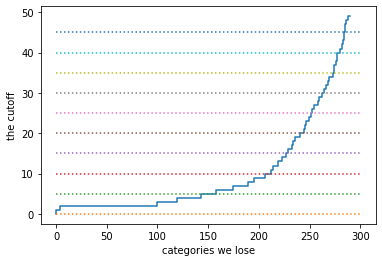

In [135]:
# Shows how much features we lose if we decide to limit the amount of instances a category should have to appear

if SHOW_IN_DEVELOPMENT:
    column_values = df.columns.map(lambda x: x.startswith("Cat_"))
    cat_df = df.loc[:, column_values]
    categ = cat_df.sum().sort_values()
    limits = range(50)
    remainders = []
    for limit in limits:
        remainders += [(categ.values<limit).sum()]
    fig= plt.figure()
    ax_graph= fig.add_subplot(1,1,1)
    ax_graph= plt.step(remainders,limits)
    for i in range(0,50,5):
        plt.plot([0,300],[i,i],linestyle= ":" )
    plt.ylabel("the cutoff")
    plt.xlabel("categories we lose")
    plt.show()

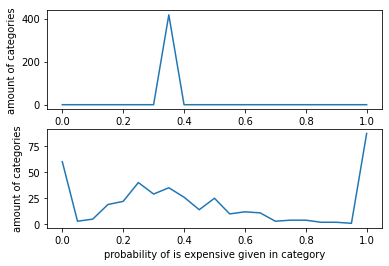

In [136]:
# Shows us how much categories we have for different probabilities
# This is only for lior

if SHOW_IN_DEVELOPMENT:
    sub_categories = filter(lambda x: x.startswith("Cat_"),df.columns)
    x0 = np.arange(0,1.05,0.05)
    y0 = np.zeros(21)
    x1 = np.arange(0,1.05,0.05)
    y1 = np.zeros(21)
    for category in sub_categories:
        mean_df = df[[target_column, category]].groupby([category]).mean()
        y0[(int)((mean_df.loc[0.0,target_column]*20).round())] += 1
        if (1.0 in mean_df.index):
            y1[(int)((mean_df.loc[1.0,target_column]*20).round())] += 1
    fig = plt.figure()
    ax0_graph = fig.add_subplot(2,1,1)
    plt.plot(x0,y0)
    plt.xlabel("probability of is expensive given not in category")
    plt.ylabel("amount of categories")
    ax1_graph = fig.add_subplot(2,1,2)
    ax1_graph = plt.plot(x1,y1)
    plt.xlabel("probability of is expensive given in category")
    plt.ylabel("amount of categories")
    plt.show()

In [137]:
## create collumns which generally represents a bunch of other collumns based on their relative probability
class create_general_collumns:
    collumn_map = np.empty(16, dtype= object)
    
    def __init__(self,starter):
        self.starts = lambda x:x.startswith(starter)
        
        
    def fit(self,df_create:pd.DataFrame):
        sub_categories = filter(self.starts,df_create.columns)
        np.empty(16, dtype= object)
        for i in range(self.collumn_map.shape[0]):
            self.collumn_map[i] = []
        for category in sub_categories:
            mean_df = df[[target_column, category]].groupby([category]).mean()
            if (1.0 in mean_df.index):
                self.collumn_map[(int)((mean_df.loc[1.0,target_column]*15).round())] += [category]
    
    
    def transform(self,df_create:pd.DataFrame):
        index=0
        for category_class in self.collumn_map:
            df_create["category_class"+str(index)] = df_create[category_class].sum(axis=1)
            index+=1

In [138]:
# Time enums

week_days = {
    "1": "Sunday",
    "2":"Monday",
    "3":"Tuesday",
    "4":"Wednesday",
    "5": "Thursday",
    "6":"Friday",
    "7":"Saturday"
}

time_open_select = [
    '12:00 AM', '12:30 AM',
    '1:00 AM', '1:30 AM',
    '2:00 AM', '2:30 AM',
    '3:00 AM', '3:30 AM',
    '4:00 AM', '4:30 AM',
    '5:00 AM', '5:30 AM',
    '6:00 AM', '6:30 AM',
    '7:00 AM', '7:30 AM',
    '8:00 AM', '8:30 AM',
    '9:00 AM', '9:30 AM',
    '10:00 AM', '10:30 AM',
    '11:00 AM', '11:30 AM',
    '12:00 PM', '12:30 PM',
    '1:00 PM', '1:30 PM',
    '2:00 PM', '2:30 PM',
    '3:00 PM', '3:30 PM',
    '4:00 PM', '4:30 PM',
    '5:00 PM', '5:30 PM',
    '6:00 PM', '6:30 PM',
    '7:00 PM', '7:30 PM',
    '8:00 PM', '8:30 PM',
    '9:00 PM', '9:30 PM',
    '10:00 PM', '10:30 PM',
    '11:00 PM', '11:30 PM',
    ]

time_end_select = [
    '12:00 AM', '12:30 AM',
    '1:00 AM', '1:30 AM',
    '2:00 AM', '2:30 AM',
    '3:00 AM', '3:30 AM',
    '4:00 AM', '4:30 AM',
    '5:00 AM', '5:30 AM',
    '6:00 AM', '6:30 AM',
    '7:00 AM', '7:30 AM',
    '8:00 AM', '8:30 AM',
    '9:00 AM', '9:30 AM',
    '10:00 AM', '10:30 AM',
    '11:00 AM', '11:30 AM',
    '12:00 PM', '12:30 PM',
    '1:00 PM', '1:30 PM',
    '2:00 PM', '2:30 PM',
    '3:00 PM', '3:30 PM',
    '4:00 PM', '4:30 PM',
    '5:00 PM', '5:30 PM',
    '6:00 PM', '6:30 PM',
    '7:00 PM', '7:30 PM',
    '8:00 PM', '8:30 PM',
    '9:00 PM', '9:30 PM',
    '10:00 PM', '10:30 PM',
    '11:00 PM', '11:30 PM',
    '12:00 AM ', '12:30 AM',
    '1:00 AM ', '1:30 AM ',
    '2:00 AM ', '2:30 AM ',
    '3:00 AM ', '3:30 AM ',
    '4:00 AM ', '4:30 AM ',
    '5:00 AM ', '5:30 AM ',
    '6:00 AM ', '6:30 AM ',
    ]


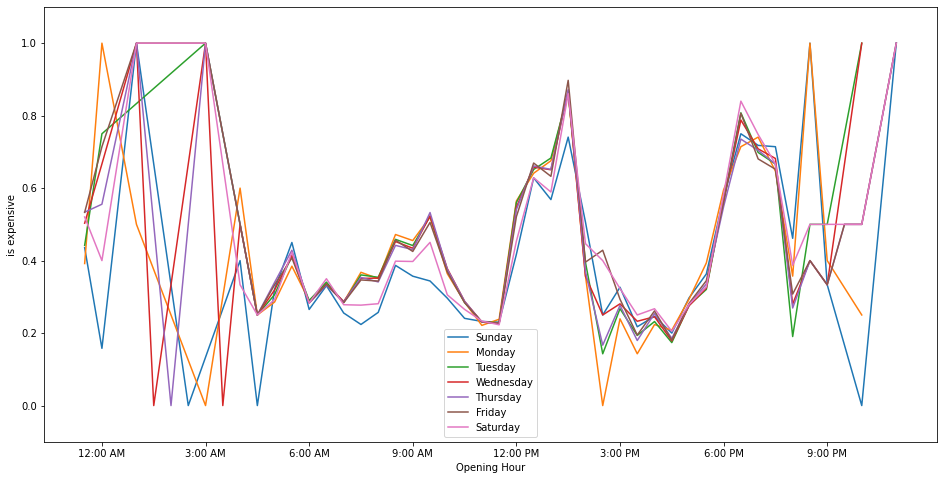

In [139]:
# Show the opening hour ped day

if SHOW_IN_DEVELOPMENT:    
    fig = plt.figure(figsize= (16, 8))
    
    ax = fig.add_subplot(1, 1, 1)
    plt.sca(ax)
    
    plt.ylabel("is expensive")
    plt.xlabel("Opening Hour")
    
    for i in range(7):
        mean_df = df[["OpenHour"+str(i+1), target_column]].groupby(["OpenHour"+str(i+1)]).mean()
        plt.plot(mean_df.index, mean_df.values, label = week_days[str(i+1)])
    
    ax.set_xticks(range(0,48,6))
    ax.set_xticklabels(map(lambda x:time_open_select[int(x)], range(0,48,6)))
    
    plt.ylim(-0.1, 1.1)
    plt.legend()
    
    plt.show()

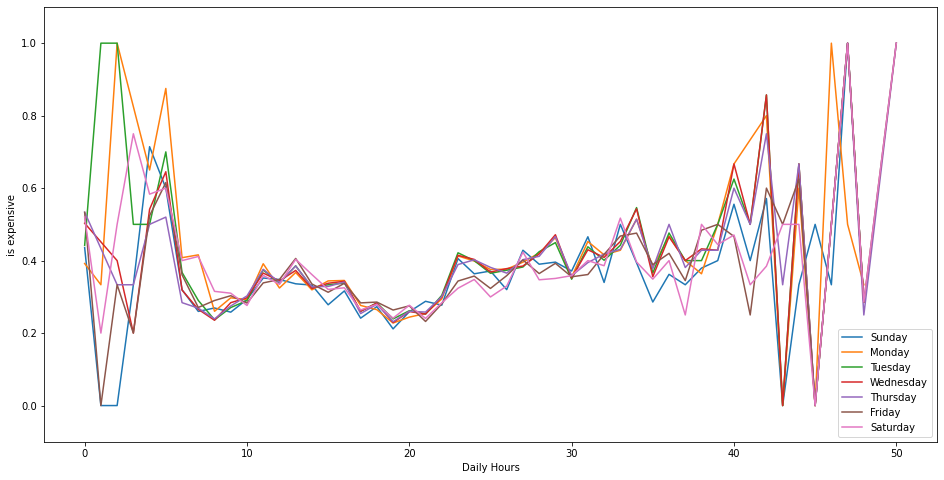

In [140]:
# Show the Daily Hours per day

if SHOW_IN_DEVELOPMENT:    
    fig = plt.figure(figsize= (16, 8))
    
    ax = fig.add_subplot(1, 1, 1)
    plt.sca(ax)
    
    plt.ylabel("is expensive")
    plt.xlabel("Daily Hours")
    
    for i in range(7):
        mean_df = df[["CountHour"+str(i+1),target_column]].groupby(["CountHour"+str(i+1)]).mean()
        plt.plot(mean_df.index,mean_df.values,label = week_days[str(i+1)])

    plt.ylim(-0.1, 1.1)
    plt.legend()
    
    plt.show()

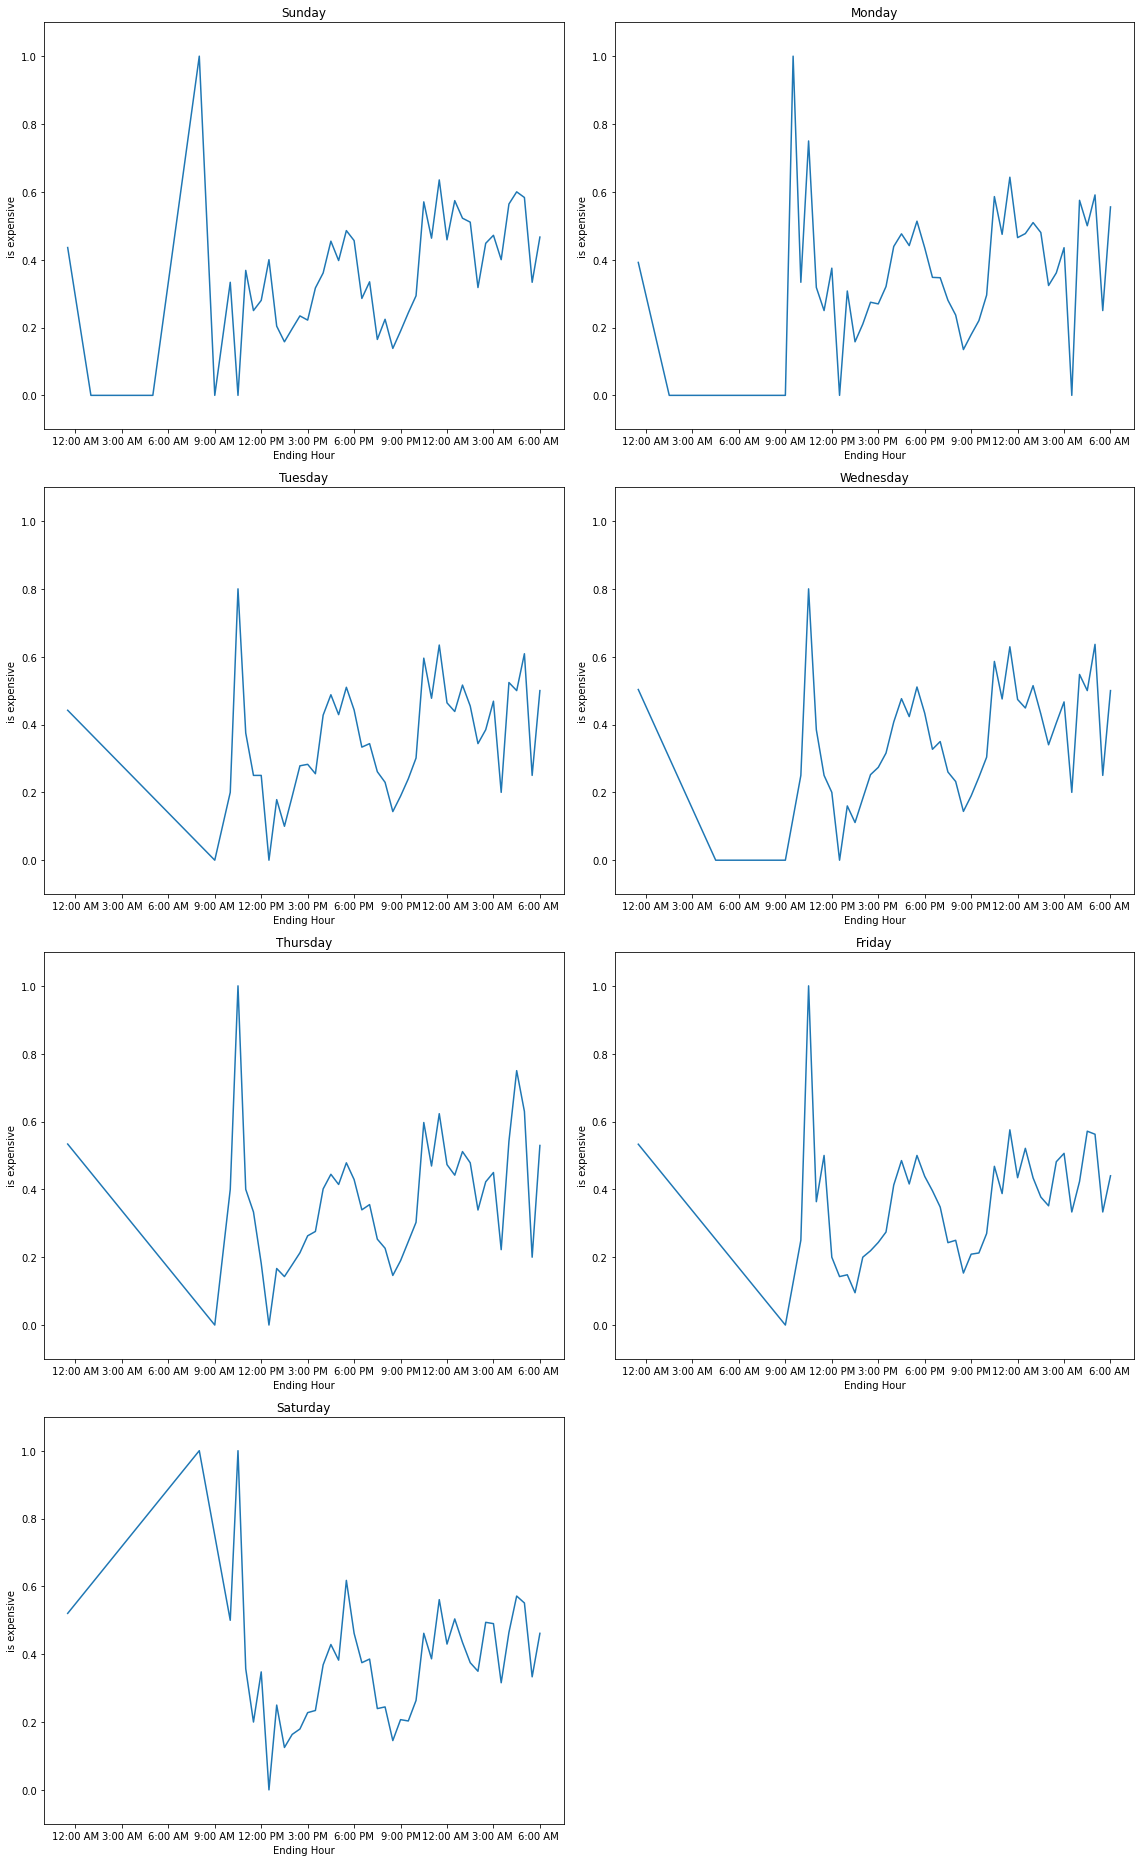

In [141]:
# Show the ending hour ped day

if SHOW_IN_DEVELOPMENT:    
    fig = plt.figure(figsize= (16, 8 * 4))
    
    for i in range(7):
        ax_end=fig.add_subplot(5, 2, 1+i)
        plt.sca(ax_end)
        plt.ylabel("is expensive")
        plt.xlabel("Ending Hour")
        ax_end.set_title(week_days[str(i+1)])
        mean_df = df[["EndHour"+str(i+1),target_column]].groupby(["EndHour"+str(i+1)]).mean()
        plt.plot(mean_df.index,mean_df.values)
        ax_end.set_xticks(range(0,61,6))
        ax_end.set_xticklabels(map(lambda x:time_end_select[int(x)], range(0,61,6)))
                    
        plt.ylim(-0.1, 1.1)
    
    
    plt.tight_layout()
    plt.show()

In [142]:
# Split the tain data,

x_sub_train, x_sub_test, y_sub_train, y_sub_test = train_test_split(x_train, y_train, random_state=42)

In [143]:
# Create a Simple model base KNN

if SHOW_IN_RELEASE:
    knn = KNeighborsClassifier()

    knn.fit(x_sub_train, y_sub_train)

    score = knn.score(x_sub_test, y_sub_test)
    print("Score: ", score)

# Score:  0.78

In [ ]:
# Create modal zero (Dummy Modal)

if SHOW_IN_RELEASE:
    dummy_modal = DummyClassifier()

    dummy_modal.fit(x_sub_train, y_sub_train)

    score = dummy_modal.score(x_sub_test, y_sub_test)
    print("Dummy Modal Score: ", score)

# Dummy Modal Score:  0.65

In [144]:
df_models = pd.DataFrame({
    'Name': [],
    'Score': [],
    'Best Params': []
})

DEFAULT_CV = 5
DEFAULT_RANDOM_STATE = 70

def try_multi_models(models):
    global x_sub_train, y_sub_train, x_sub_test, y_sub_test
    global df_models
    
    ret = []
    
    df_models_add = pd.DataFrame({
        'Name': np.full(len(models), None),
        'Score': np.full(len(models), None),
        'Best Params': np.full(len(models), None),  
    })
        
    i = 0
    for model_params in models:
        name = model_params['name']
        df_models_add.at[i, 'Name'] = name
        print('Work on ', name)
        try:
            model_class = model_params['model']
            if ('disable_random_state' in model_params and model_params['disable_random_state']):
                model = model_class()
            else:
                model = model_class(random_state=DEFAULT_RANDOM_STATE)
                
            if 'cv' in model_params:
                cv = model_params['cv']
            else:
                cv = DEFAULT_CV
            
            param_grid = model_params['params']
            
            if cv is None:
                grid_search = GridSearchCV(estimator=model, param_grid=param_grid)
            else:
                grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv)
            
            print('Fit ', name)
            grid_search.fit(x_sub_train, y_sub_train)
            
            score = grid_search.score(x_sub_test, y_sub_test)
            print(name, " Score: ", score)
            
            df_models_add.at[i, 'Score'] = score
            df_models_add.at[i, 'Best Params'] = json.dumps(grid_search.best_params_)
            
            if 'selected' in model_params and model_params['selected']:
                res_as_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]), pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)
                res_as_df.sort_values('Accuracy', ascending=False, inplace=True)
                ret.append(res_as_df)
            
        except Exception as ex:
            print(name, " Failed!", ex)
        
        i += 1
    
    df_models = pd.concat([df_models, df_models_add])
    df_models.reset_index(drop=True, inplace=True)
    
    return ret

In [ ]:
# First tring

if SHOW_IN_RELEASE:
    models = [
        
        {
            'name': 'KNeighborsClassifier',
            'model': KNeighborsClassifier,
            'params': {},
            'disable_random_state': True
        }, {
            'name': 'LogisticRegression',
            'model': LogisticRegression,
            'params': {
                'max_iter': [100, 200]
            }
        }, {
            'name': 'Lasso',
            'model': Lasso,
            'params': {}
        }, {
            'name': 'LinearSVC',
            'model': LinearSVC,
            'params': {}
        }, {
            'name': 'SVR',
            'model': SVR,
            'params': {},
            'disable_random_state': True
        }, {
            'name': 'RandomForestClassifier',
            'model': RandomForestClassifier,
            'params': {}
        }
    ]

    try_multi_models(models)

# RandomForestClassifier Score:  0.8541162227602905
# LinearSVC              Score:  0.8243038740920097
# LogisticRegression     Score:  0.8187046004842615
# KNeighborsClassifier   Score:  0.7860169491525424
# SVR                    Score:  0.3687542760469187
# Lasso                  Score:  0.10050948422148354

In [ ]:
# Tring other models

if SHOW_IN_RELEASE:
    models = [
        {
            'name': 'RandomForestRegressor',
            'model': RandomForestRegressor,
            'params': {}
        }
    ]

    try_multi_models(models)
# RandomForestRegressor  Score:  0.5371579181722024

In [145]:
df_models

,Name,Score,Best Params


In [146]:
df_models.sort_values('Score', ascending=False, inplace=True)
df_models

,Name,Score,Best Params


In [147]:
# The bast score comes form Random Forest Classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
# Learning about VotingClassifier

if SHOW_IN_RELEASE:
    vs = VotingClassifier(estimators=[
        ('RandomForestClassifier', RandomForestClassifier()),
        ('LogisticRegression', LogisticRegression())
    ])

    vs.fit(x_sub_train, y_sub_train)

    score = vs.score(x_sub_test, y_sub_test)
    print("Voting Classifier Score: ", score)

# Voting Classifier Score:  0.8221852300242131

# Not good, Random Forest gives 0.85 alone

In [150]:
# Tring other models

ret = ['None']
if SHOW_IN_DEVELOPMENT:
    models = [
        {
            'name': 'RandomForestClassifier V2',
            'model': RandomForestClassifier,
            'params': {
                'n_estimators': range(100, 201, 100)
            }
        }
    ]

    try_multi_models(models)

# n_estimators not Change to muth,
# 100 estimators is the best

ret[0]

RandomForestClassifier V2  Score:  0.8553268765133172
Work on  RandomForestClassifier V2
Fit  RandomForestClassifier V2
RandomForestClassifier V2  Score:  0.8553268765133172


In [ ]:
scaler = StandardScaler()
x_sub_train=scaler.fit_transform(X=x_sub_train)
x_sub_test=scaler.transform(x_sub_test)

In [ ]:
if SHOW_IN_DEVELOPMENT:
    models = [
        {
            'name': 'KNeighborsClassifier Scaler',
            'model': KNeighborsClassifier,
            'params': {},
            'disable_random_state': True
        }, {
            'name': 'LogisticRegression Scaler',
            'model': LogisticRegression,
            'params': {
                'max_iter': [100, 200]
            }
        }, {
            'name': 'Lasso Scaler',
            'model': Lasso,
            'params': {}
        }, {
            'name': 'LinearSVC Scaler',
            'model': LinearSVC,
            'params': {}
        }, {
            'name': 'SVR Scaler',
            'model': SVR,
            'params': {},
            'disable_random_state': True
        }, {
            'name': 'RandomForestClassifier Scaler',
            'model': RandomForestClassifier,
            'params': {
                'n_estimators': range(100, 851, 50)
            },
            'selected': True
        }
    ]

    ret = try_multi_models(models)

# 
ret[0]

In [ ]:
df_models.sort_values('Score', ascending=False, inplace=True)
df_models